In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential,layers,optimizers
from tensorflow.keras import initializers

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
# Loading  the Iris dataset 
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head() # Printing the first 5 rows of the dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## split the iris data into train and test

In [3]:
X = df.drop(['target'], axis = 1)  # separating the inputs (features) from the df into variable X
y = df['target']  # separating the outputs (labels) from the df into variable y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
print("y_train:")
pd.DataFrame(y_train).head()

y_train:


,target
22,0
15,0
65,1
11,0
42,0


In [5]:
print("y_test:")
pd.DataFrame(y_test).head()

y_test:


,target
73,1
18,0
118,2
78,1
76,1


In [6]:
# Convert the target variables to one-hot encoded format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)  # (120, 3)
print(y_test.shape)  # (30, 3)

(120, 3)
(30, 3)


In [7]:
print("y_train in OHE format:")
pd.DataFrame(y_train).head()

y_train in OHE format:


,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [8]:
print("y_test in OHE format:")
pd.DataFrame(y_test).head()

y_test in OHE format:


,0,1,2
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


##  A Neural network model with the Adam optimizer and categorical cross-entropy loss function

In [9]:
# Define the model architecture

model = Sequential([
    layers.Dense(16, input_shape=(4,), activation='relu', kernel_initializer=initializers.RandomNormal(stddev=0.1)),
    layers.Dense(8, activation='relu', kernel_initializer=initializers.RandomNormal(stddev=0.1)),
    layers.Dense(3, activation='softmax', kernel_initializer=initializers.RandomNormal(stddev=0.1))
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=60, batch_size=8,shuffle = False, validation_data=(X_test, y_test), verbose=0)

## final parameter values for each layer at the end of training

In [11]:
weights = model.get_weights()  # Get the layer-wise weights of the model

# Print the shape of the weights for each layer
for i in range(len(weights)//2):
    w_shape = weights[2*i].shape
    b_shape = weights[2*i+1].shape
    print(f"Layer {i+1}:")
    print(f"\tWeights shape: {w_shape}")
    print(f"\tBiases shape: {b_shape}\n")

Layer 1:
	Weights shape: (4, 16)
	Biases shape: (16,)

Layer 2:
	Weights shape: (16, 8)
	Biases shape: (8,)

Layer 3:
	Weights shape: (8, 3)
	Biases shape: (3,)



In [12]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 37ms/step - loss: 0.1356 - accuracy: 0.9667


## Train vs Test Loss

In [13]:
print('Train loss:', test_loss)

print('Test loss:', test_loss)

Train loss: 0.13556237518787384
Test loss: 0.13556237518787384


## Train vs Test Accuracy

In [14]:
print('Train accuracy:', test_acc)

print('Test accuracy:', test_acc)

Train accuracy: 0.9666666388511658
Test accuracy: 0.9666666388511658


## F1 score

In [15]:
from sklearn.metrics import f1_score

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
f1_scores = f1_score(np.argmax(y_test, axis=1), y_pred, average=None)
# Create a list of f1 score values
f1_scores = [f1_scores[0], f1_scores[1], f1_scores[2]]

# Create a dataframe with the f1 score values and column name
df = pd.DataFrame({'f1 score': f1_scores})

# Print the dataframe
df

1/1 [==============================] - 0s 109ms/step


,f1 score
0,1.000000
1,0.941176
2,0.956522


## Plot of Loss function vs Epoch

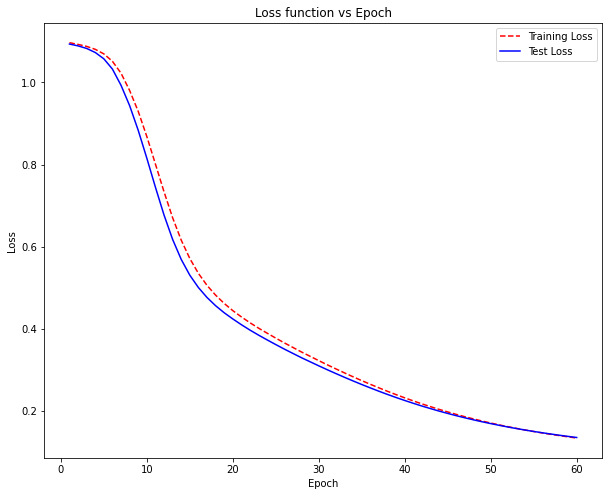

In [16]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize=(10,8))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.title('Loss function vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [17]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
# print(cm)

# Create DataFrame from confusion matrix
df_cm = pd.DataFrame(cm, columns=['Predicted Class 0', 'Predicted Class 1', 'Predicted Class 2'], 
                     index=['Actual Class 0', 'Actual Class 1', 'Actual Class 2'])

df_cm

1/1 [==============================] - 0s 19ms/step


,Predicted Class 0,Predicted Class 1,Predicted Class 2
Actual Class 0,10,0,0
Actual Class 1,0,8,1
Actual Class 2,0,0,11


<AxesSubplot:>

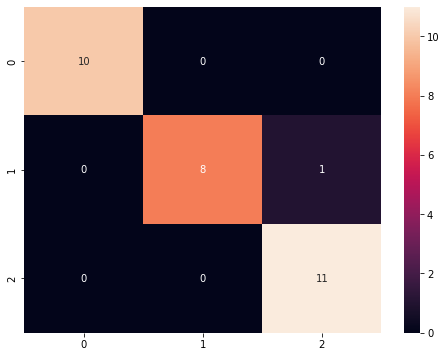

In [18]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='.3g')

In [19]:
def predict(model, input_data):
    return model.predict(input_data)

y_pred = predict(model, X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(np.argmax(y_test, axis=1), y_pred, zero_division=1.0))

1/1 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

